In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
-np.log2(0.5)

1.0

In [4]:
-np.log2(0.1)

3.321928094887362

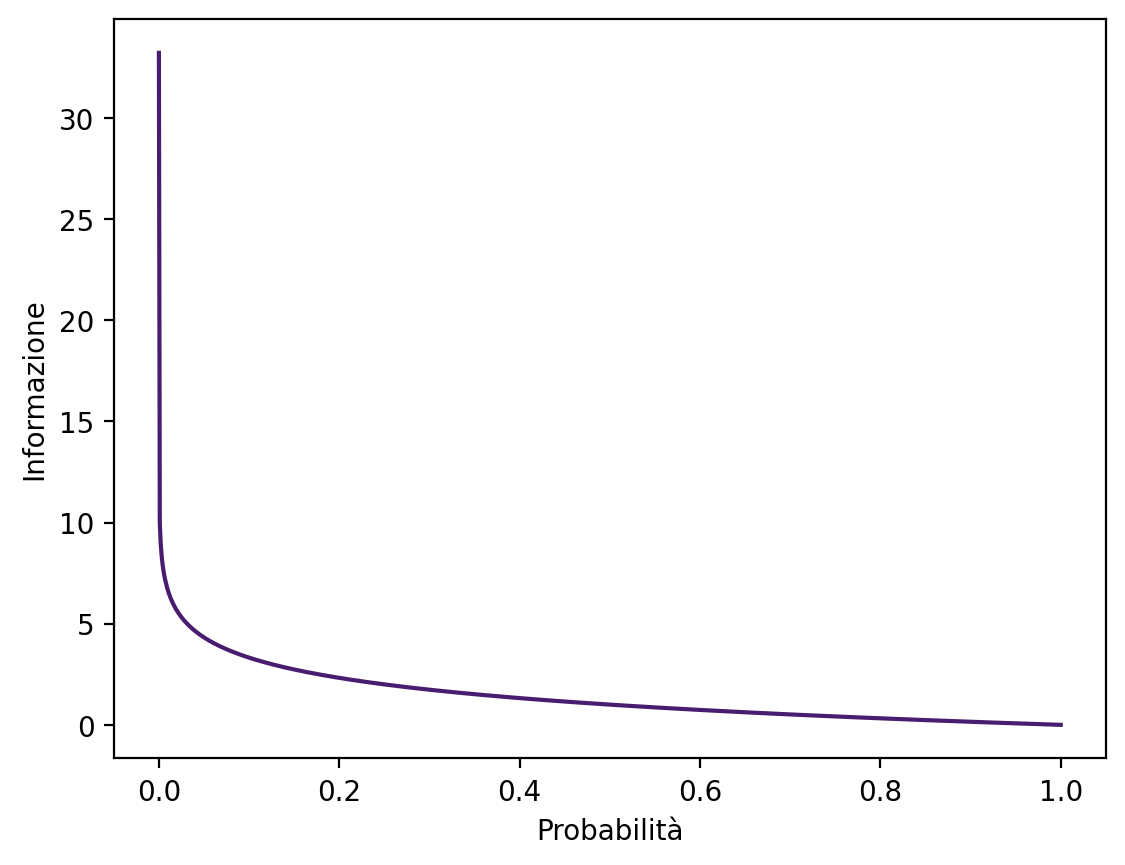

In [5]:
# Create a sequence of 1000 equally spaced points from 0 to 1
p = np.linspace(0, 1, 1000)

# Avoid log(0) by replacing 0 with a small value
p[p == 0] = 1e-10

# Compute the negative log base 2 of p
h = -np.log2(p)

df = pd.DataFrame({'Probabilità': p, 'Informazione': h})

plt.plot('Probabilità', 'Informazione', data=df)
plt.xlabel('Probabilità')
plt.ylabel('Informazione');

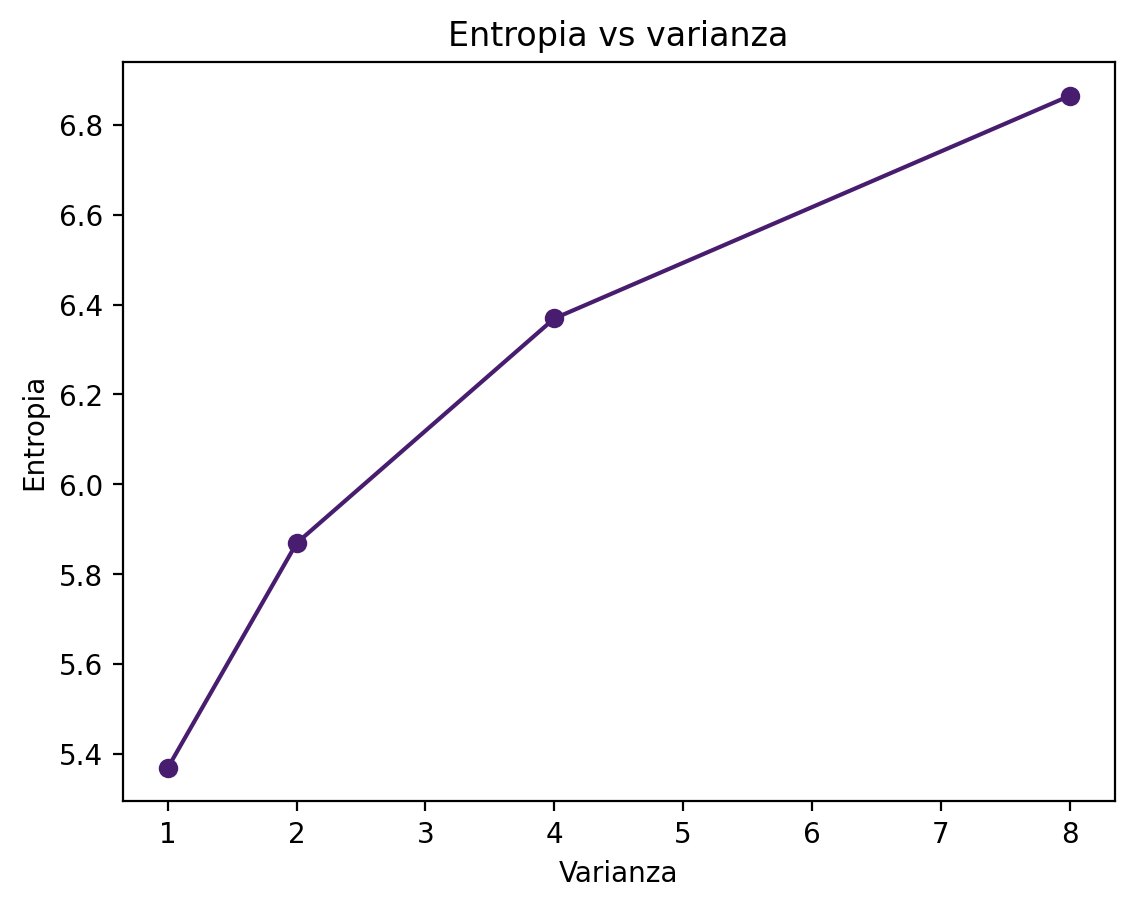

In [6]:
# Intervallo di valori discreti
x = np.arange(-10, 10, 0.1)

def calculate_entropy(variance):
    # Distribuzione normale con media 0 e varianza specifica
    probabilities = stats.norm.pdf(x, 0, np.sqrt(variance))
    
    # Normalizzazione delle probabilità in modo che sommino a 1
    probabilities /= probabilities.sum()
    
    # Calcolo dell'entropia
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Varianze da esplorare
variances = [1, 2, 4, 8]

# Calcolo e tracciamento dell'entropia per diverse varianze
entropies = [calculate_entropy(variance) for variance in variances]

plt.plot(variances, entropies, marker='o')
plt.title('Entropia vs varianza')
plt.xlabel('Varianza')
plt.ylabel('Entropia');

In [7]:
def calculate_entropy(probabilities):
    return -np.sum(probabilities * np.log2(probabilities))

# Distribuzioni con la stessa varianza ma diverse probabilità
probabilities1 = np.array([0.5, 0.25, 0.25])
probabilities2 = np.array([0.3333, 0.3333, 0.3334])

# Calcolo dell'entropia per entrambe le distribuzioni
entropy1 = calculate_entropy(probabilities1)
entropy2 = calculate_entropy(probabilities2)

print(f"Entropia della distribuzione 1: {entropy1}")
print(f"Entropia della distribuzione 2: {entropy2}")

Entropia della distribuzione 1: 1.5
Entropia della distribuzione 2: 1.5849624862946867


In [8]:
# True probabilities
p = np.array([0.7, 0.2, 0.1])

# Another set of probabilities
q = np.array([0.5, 0.3, 0.2])

# Calculate expected score for p
expected_score_p = np.sum(p * np.log(p))

# Calculate expected score for r
expected_score_q = np.sum(p * np.log(q))

# Calculate the difference in expected scores
delta = expected_score_p - expected_score_q

# Calculate KL divergence between p and r
kl_divergence = np.sum(p * np.log(p / q))

expected_score_p, expected_score_q, delta, kl_divergence

(-0.8018185525433372,
 -0.886941378500559,
 0.08512282595722176,
 0.0851228259572216)

In [9]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

arviz      : 0.16.0
scipy      : 1.10.1
pandas     : 2.0.3
numpy      : 1.25.2
seaborn    : 0.12.2
statsmodels: 0.14.0
matplotlib : 3.7.2

Watermark: 2.4.3

